In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv(r'C:\Users\gupta\Desktop\Adyansh\Courses\INTELIPAAT\Customer Churn Project\customer_churn (1).csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data  Manipulation


In [5]:
#Extract the 5th column & store it in ‘customer_5’
customer_5 = df.iloc[:, 4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [6]:
#Extract the 15th column & store it in ‘customer_15’
customer_15 = df.iloc[:, 14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [7]:
#Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [8]:
#Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [9]:
#Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [10]:
#Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’
customer_333 = df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3716,6688-UZPWD,Female,0,Yes,No,11,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.00,1145.35,Yes
6643,3411-WLRSQ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.60,239.05,No
1830,7321-KKSDU,Male,0,No,Yes,32,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.50,696.8,No
4421,4636-JGAAI,Male,0,Yes,No,34,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,88.85,3000.25,No
4557,5944-UGLLK,Male,0,No,No,53,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),54.90,3045.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,3058-HJCUY,Male,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,102.60,4213.35,Yes
3457,8566-YPRGL,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.50,19.5,No
472,1304-BCCFO,Male,0,Yes,No,9,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Mailed check,70.05,564.4,No
4378,6980-CDGFC,Female,0,Yes,No,67,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.85,1327.4,No


In [11]:
#Get the count of different levels from the ‘Churn’ column
df['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Visualization

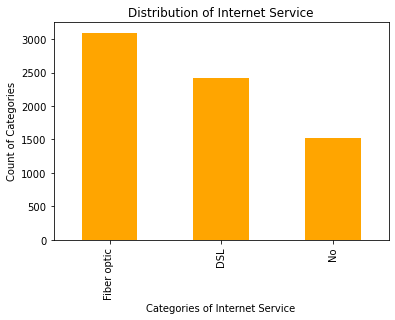

In [12]:
#Build a bar-plot for the ’InternetService’ column
df['InternetService'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

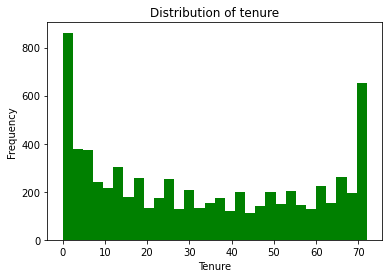

In [13]:
#Build a histogram for the ‘tenure’ column:
df['tenure'].plot(kind='hist', bins=30, color='green')
plt.xlabel('Tenure')
plt.title('Distribution of tenure')
plt.show()

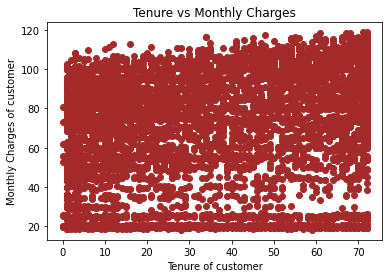

In [14]:
#Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()


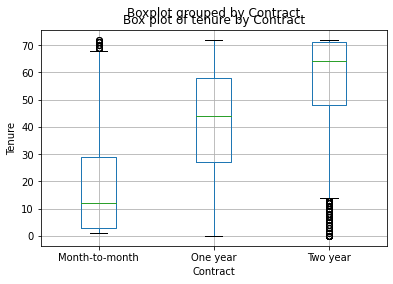

In [15]:
#Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis. 
df.boxplot(column=['tenure'], by=['Contract'])
plt.ylabel('Tenure')
plt.xlabel('Contract')
plt.title('Box plot of tenure by Contract')
plt.show()

# Linear Regression

In [16]:
#Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure

# Divide the dataset into train and test sets in 70:30 ratio
X = df[['tenure']]
y = df['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build the model on train set and predict the values on test set
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Find the root mean square error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Find the error in prediction & store the result in ‘error’ make it a table
error = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': y_test - y_pred})
print(error.head(20))

# Display the root mean square error
print("Root Mean Square Error:", rmse)

      Actual  Predicted      Error
2200   58.20  60.950896  -2.750896
4627  116.60  72.980967  43.619033
3225   71.95  59.190398  12.759602
2828   20.45  55.669402 -35.219402
3768   77.75  71.513885   6.236115
4446   79.90  56.256234  23.643766
2234   59.70  62.124562  -2.424562
5454   69.55  55.669402  13.880598
1278   60.70  65.938974  -5.238974
578    94.55  65.645558  28.904442
5960   84.45  73.567800  10.882200
521    51.60  63.885060 -12.285060
217    56.60  74.741465 -18.141465
5716   55.30  55.962818  -0.662818
202   105.55  76.208547  29.341453
134    44.35  55.962818 -11.612818
154    19.70  57.136483 -37.436483
4486   89.20  73.274383  15.925617
3283   20.35  75.621714 -55.271714
3731   69.80  55.962818  13.837182
Root Mean Square Error: 29.394584027273893


# Logistic Regression

In [17]:
#Build a simple logistic regression modelwhere dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’

# Creating the feature and target variables
X = df[['MonthlyCharges']]
y = df['Churn']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

# Creating the logistic regression object
logreg = LogisticRegression()

# Fitting the model on the train set
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Building the confusion matrix and calculating accuracy score
conf_mat = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Accuracy Score:", acc_score)


Confusion Matrix:
 [[1840    0]
 [ 626    0]]
Accuracy Score: 0.7461476074614761


In [18]:
#Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’


# Creating the feature and target variables
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Creating the logistic regression object
logreg = LogisticRegression()

# Fitting the model on the train set
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Building the confusion matrix and calculating accuracy score
conf_mat = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Accuracy Score:", acc_score)


Confusion Matrix:
 [[965  96]
 [190 158]]
Accuracy Score: 0.7970191625266146


# Decision Tree

In [19]:
#Build a decision tree model where dependent variable is ‘Churn’ & independen variable is ‘tenure’

X = df[['tenure']] # independent variable
y = df['Churn'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[951  85]
 [257 116]]
Accuracy: 0.7572746628814763


# Random Forest

In [20]:
#Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’


X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[1352  233]
 [ 276  252]]
Accuracy: 0.759110269758637


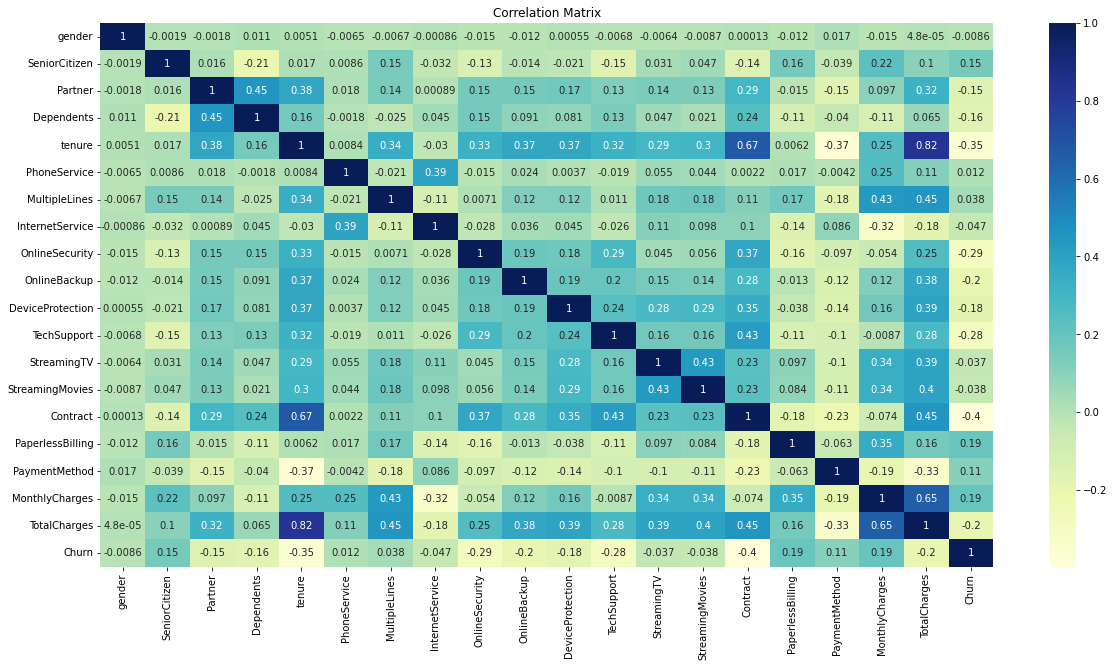

Logistic Regression:

Accuracy: 81.07%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

Confusion Matrix:
 [[1386  153]
 [ 247  327]]



Decision Tree:

Accuracy: 73.12%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1539
           1       0.51      0.49      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113

Confusion Matrix:
 [[1262  277]
 [ 291  283]]



Random Forest:

Accuracy: 79.22%

Classification Report:
               precision    recall  f1-score   support

           0 

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Drop unnecessary columns
df.drop(['customerID'], axis=1, inplace=True)

# Convert TotalCharges to float and replace missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# Scale numerical variables
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Visualize correlation between features and target variable
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

# Split data into training and test sets
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(name + ":\n")
    print("Accuracy: {:.2f}%\n".format(accuracy * 100))
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n\n")


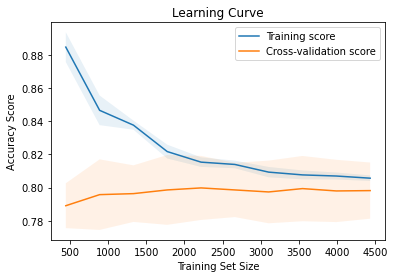

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()


C:\Users\gupta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


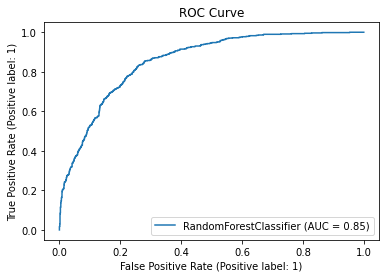

In [23]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the parameter grid for the Random Forest Classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

# perform a grid search using cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# evaluate the model on the testing set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv(r'C:\Users\gupta\Desktop\Adyansh\Courses\INTELIPAAT\Customer Churn Project\customer_churn (1).csv')
# Remove unnecessary columns
df = df.drop(['customerID', 'gender', 'PhoneService', 'TotalCharges'], axis=1)

# Convert binary categorical columns to numerical
bin_cols = ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in bin_cols:
    df[col] = le.fit_transform(df[col])

# Convert other categorical columns to dummy variables
cat_cols = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=cat_cols)

# Scale the data
scaler = StandardScaler()
X = df.drop('Churn', axis=1)
y = df['Churn']
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.69      0.51      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

